#### A jak dobrać liczbę klastrów ?

Zazwyczaj liczba klastrów jest podyktowana przez biznes. W przypadkach, których tak nie jest możemy wesprzeć się kilkoma metodami:
- **metoda łokcia** (*ang. elbow method*)
- **sylwetka** (*ang. silhouette score*)
- **David-Bouldin Index** (DBI, DB Index)
- Calinski–Harabasz index (CHI, CH Index)
- Dunn Index (DI)

W ogólności powyższe metody polegają na dobraniu jakiejś metryki jakości klasteryzacji, a następnie poszukiwaniu takiej liczby klastrów, dla której wykorzystana metryka zwraca optymalną wartość. 

Wszystkie opierają się na zestawieniu ze sobą reprezentowanych na różne sposoby odległości wewnątrzklastrowych (*ang. intra-cluster distance*) oraz odległości międzyklastrowych (*ang. inter-cluster distance*). 

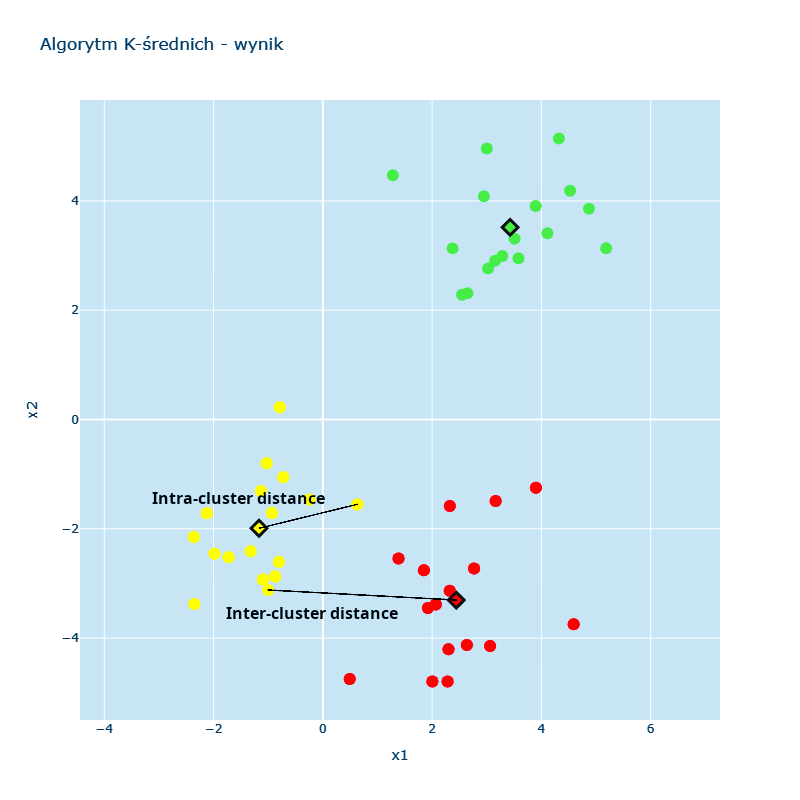

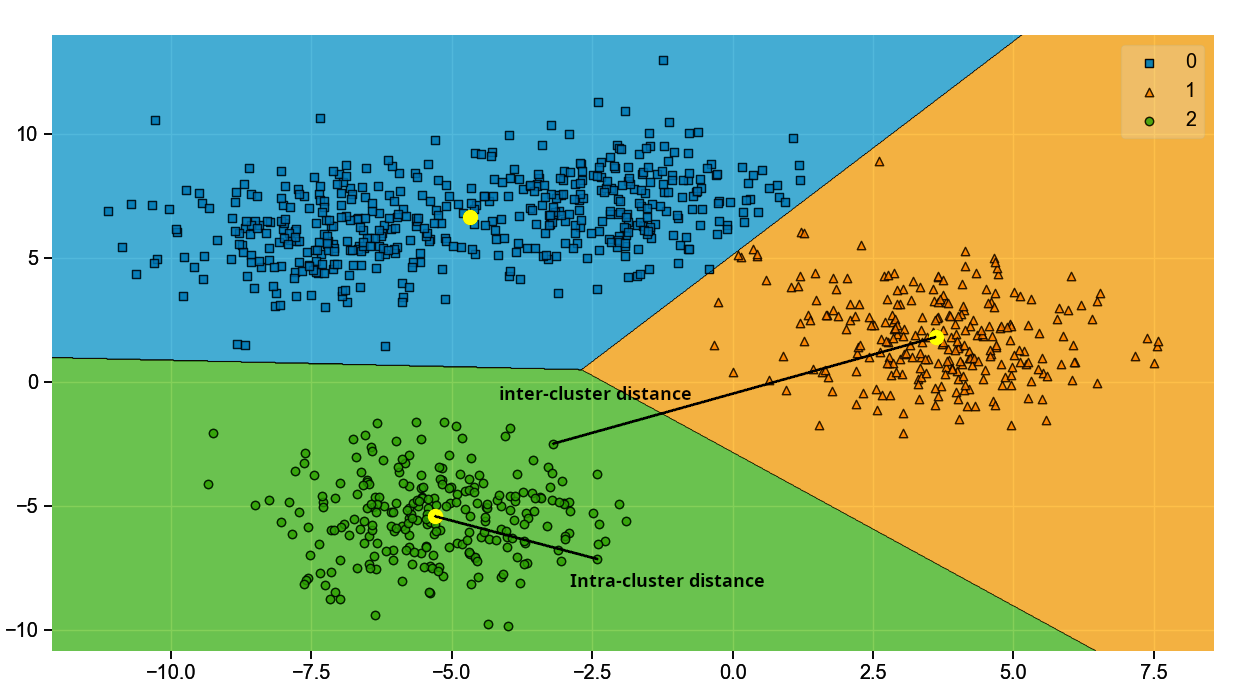

Jedną z najpopularniejszych metod jest metoda łokcia (*ang. elbow method*).

### 1. Metoda łokcia

Metoda łokcia opiera się na metryce WSS (*ang. Within-cluster Sum-of-Squared*) suma kwadratów wewnątrzklastrowych.
Jako jedyna z omawianych metod opiera się wyłącznie na odległości wewnątrzklastrowej.

Dla pojedynczego klastra $C_{k}$ odległość $WSS(C_{k})$ to suma odległości od centroidu $c_{k}$ tego klastra wszystkich jego punktów $p_{i}$. Wartość WSS zależy oczywiście od przyjętej metryki. We wzorze poniżej przyjęto metrykę euklidesową.

$$WSS(C_{k}) = \sum_{i=1}^{n}|| c_{k}-p_{i} ||^{2}$$, gdzie n to liczba punktów w klastrze

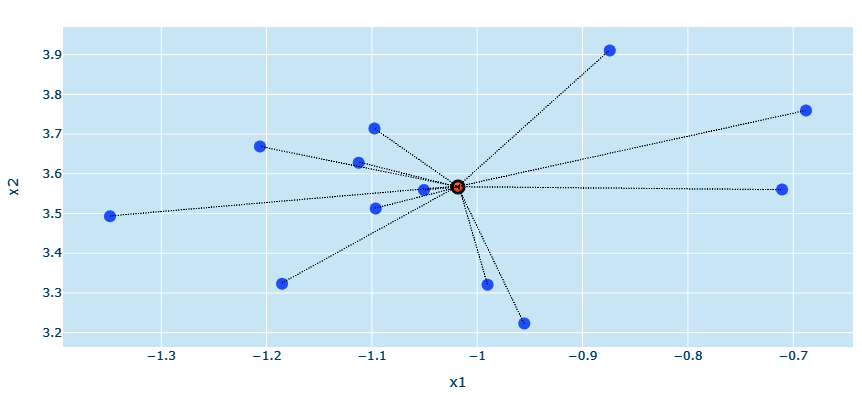

Metryką w metodzie łokcia jest suma WSS po wszystkich klastrach.

$$WSS = \sum_{k=1}^{m} WSS(C_{k})$$, gdzie m to liczba klastrów

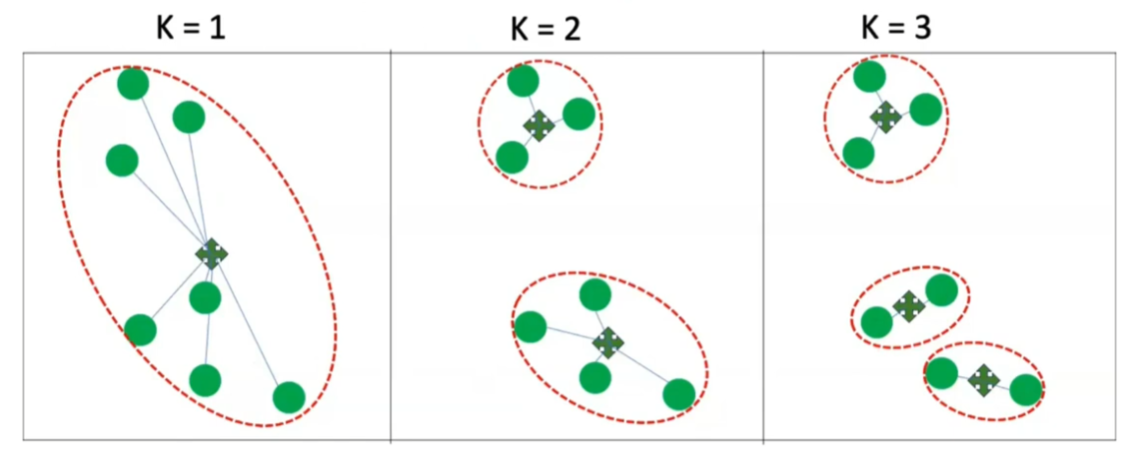

Cecha klastra, którą opisuje suma kwadratów odległości wszystkich punktów tego klastra od jego centroidu często nazywana jest **spójnością klastra** lub **dyspersją klastra**.

Widzimy, że wraz ze wzrostem liczny klastrów wartość WSS będzie malała, aż dojdziemy do sytuacji "idealnej" zdaniem tej metryki, w której każdy punkt będzie stanowił odrębny klaster, a wartość WSS będzie wynosiła 0. Ale w metodzie łokcia nie chodzi o to, żeby znaleźć taką liczbę klastrów dla której wartość WSS będzie najmniejsza (bo to jest trywialne i taką wartością zawsze będzie liczba punktów w zbiorze danych), tylko znaleźć taką liczbę klastrów, od której zwiększanie liczby klastrów nie przynosi już znaczących zmian w wartości WSS.

Metodę łokcia często wizualizauje się na wykresie zależności metryki WSS od liczby klastrów.

Przykładowy wykres wss od liczby klastrów

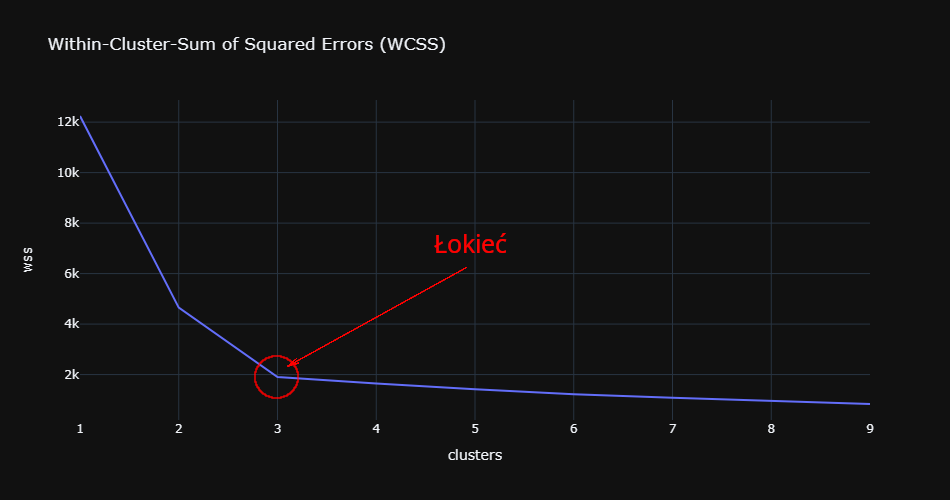

### 2. Sylwetka

Metoda łokcia nie jest jedyną metodą znajdywania optymalnej liczby klastrów. Inną popularną metodą jest metoda oparta na metryce silhouette. Metryka silhouette uwzględnia zarówno odległości wewnątrzklastrowe jak i odległości międzyklastrowe.

Odległości wewnątrzklastrowe opisują stopień spójności (lub dyspersji) klastra. Odległości międzyklastrowe opisują stopień separacji dwóch klastrów. W ramach klasteryzacji dążymy do zmaksymalizowania spójności (lub zminimalizowania dyspersji) poszczególnych klastrów oraz zmaksymalizowaniu stopnia odseparowania różnych klastrów od siebie.

Wzór ogólny na wartość silhouette $s$ dla pojedynczej próbki $i$ wyraża się wzorem:

$$s_{i} = \frac{b_{i}-a_{i}}{max(a_{i},\space b_{i})}$$

gdzie $a_{i}$ to średnia odległość pomiędzy punktem $i$, a pozostałymi punktami wewnątrz klastra punktu $i$ (miara podobieństwa punktu ${i}$ do innych punktów w klastrze punktu ${i}$)

$$ a_{i} = \frac{1}{|C_{i}|-1} \sum_{j \in C_{i}, j \neq i}|| a_{i}-p_{j} ||^{2}$$,

gdzie $C_{i}$ - klaster punktu $i$

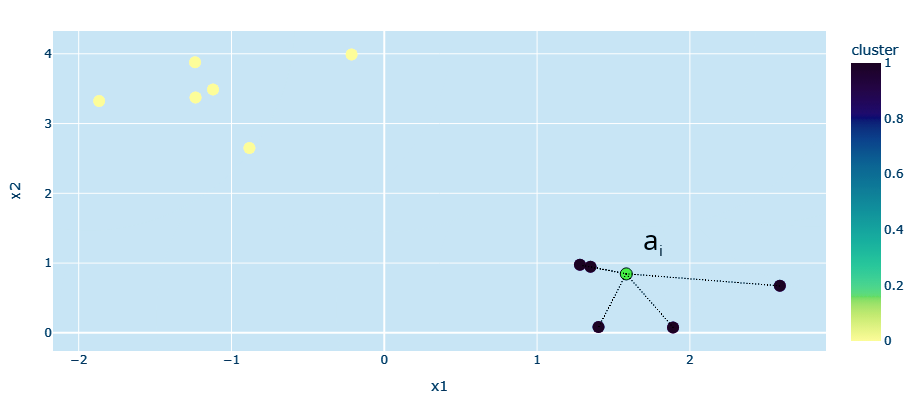

$b_{i}$ to średnia odległość pomiędzy punktem $i$, a wszystkimi punktami w klastrze najbliższym klastrowi punktu $i$ (miara podobieństwa punktu ${i}$ do punktów klastra najbliższego klastrowi punktu ${i}$)

$$ b_{i} = \frac{1}{|C_{k}|} \sum_{j \in C_{k}}|| a_{i}-p_{j} ||^{2}$$,

gdzie $C_{k}$ - klaster najbliższy klastrowi punktu $i$

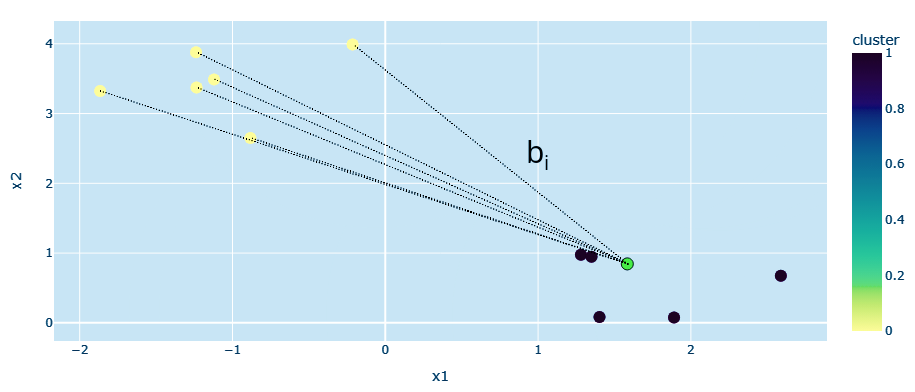

Im większa wartość $a_{i}$ tym punkt $i$ jest mniej podobny do pozostałych punktów znajdujących się w klastrze (tym mniej pasuje do klastra). Chcemy, żeby wartość $a_{i}$ była jak najmniejsza.

Im większa wartość $b_{i}$ tym punkt ${i}$ jest mniej podobny do sąsiedniego klastra (tym mniej pasuje do sąsiedniego klastra). Chcemy, żeby wartość $b_{i}$ była jak największa.

$$s_{i} \in [-1, 1]$$

Im większa wartość $s_{i}$ tym lepsze jest dopasowanie punkt {i} do klastra, im mniejsze tym dopasowanie gorsze.

Najlepsza sytuacja:
$$a_{i}=0 \Longrightarrow s_{i}=1$$

Najgorsza sytuacja:
$$b_{i}=0 \Longrightarrow s_{i}=-1$$

Każdy punkt ${i}$, dla którego współczynnik $s_{i}$ jest mniejszy od 0 należy rozpatrywać jako punkt zaklasyfikowany do nieprawidłowego klastra.

Dążymy do takiej klasteryzacji danych, przy której:
$$b_{i} >> a_{i}$$

Do ostatecznej oceny jakości klasteryzacji używa się miary **silhouette score**, która jest uśrednioną wartością współczynnika silhoutte po wszystkich punktach zbioru danych.

$$S = \frac{1}{N} \sum_{i} s_{i}$$

### 3. Davies-Bouldin Index

Davies-Bouldin Index podobnie jak silhouette opiera się na mierze podobieństwa wewnątrzklastrowego oraz mierze podobieństwa międzyklastrowego. Im mniejsza wartość DBI tym lepsza jest klasteryzacja.

Indeks Davies-Bouldin (w skrócie DBI) pomiędzy dwoma klastrami ${i}$, ${j}$ wyraża się wzorem:

$$D_{ij} = \frac{d_{i}+d_{j}}{d_{ij}}$$

gdzie: $d_{ij}$ - stopień separacji klastrów ${i}$, ${j}$ liczona jako odległość pomiędzy centroidami $c_{i}$. $c_{j}$ obu klastrów

$$d_{ij}=||c_{i} - c_{j}||$$

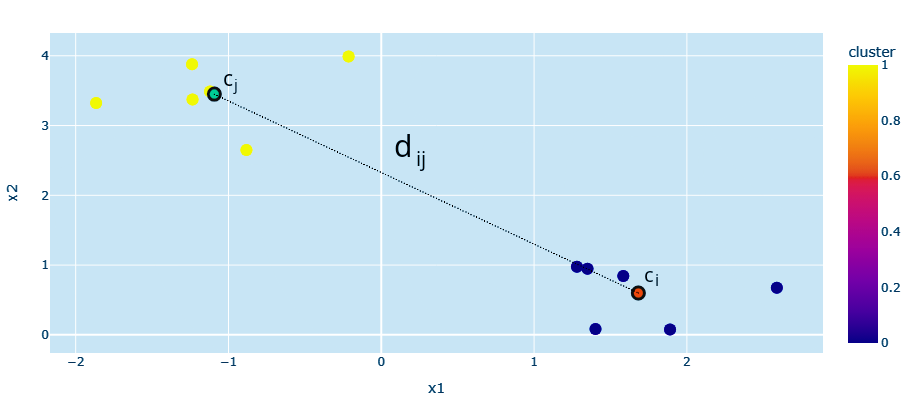

Im większa odległość między klastrami tym bardziej odseparowane od siebie są klastry, czyli tym lepsza klasteryzacja, dlatego odległość między klastrami jest w mianowniku na wzór DBI.

$d_{i}$, $d_{j}$ to spójność (dyspersja) klastra odpowiednio $i$, $j$ taką jaką znamy z miary WSS.

czyli DBI dwóch klastrów jest wprost proporcjonalna do sumy spójności tych klastrów i odwrotnie proporcjonalna do odległości pomiędzy tymi klastrami.

Indeksem Davies-Boulding klastra $C_{k}$ nazywamy maksymalną wartość DBI pomiędzy klastrem $k$, a innymi klastrami.

$$DB(C_{k})=max(D_{kj})$$

gdzie $j$ to indeks klastra $C$ taki, że $j \neq k$

Miarą jakości dopasowania Davies-Bouldin dla całego grupowania nazywamy uśrednioną wartość DBI dla poszczególnych klastrów:

$$DB(C) = \frac{1}{k} \sum_{i=1}^{k} DB(C_{k})$$

Optymalna liczba klastrów to taka, która minimalizuje wartość DBI.